In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [13]:
import subprocess
import time

def collect_info(program, filename, times_list, coverages_list):
    
    with open(f'./entradas/{filename}','r') as input_file, open(f'./solucoes/{filename.replace("entrada", "solucao")}','a') as solution_file:    
        for line in input_file:
            solution_file.write(line)


    with open(f'./entradas/{filename}','r') as input_file, open(f'./solucoes/{filename.replace("entrada", "solucao")}','a') as solution_file, open(f'./saidas/{filename.replace("entrada", "saida")}','a') as output_file:

        start = time.perf_counter()
        proc = subprocess.run([f'./{program}'], input=input_file.read(), text=True, capture_output=True)
        end = time.perf_counter()
        times_list.append(end-start)

        solution_file.write(f'\n{proc.stdout}')
        output_file.write(proc.stdout)
    
    with open(f'./solucoes/{filename.replace("entrada", "solucao")}','r') as solution_file:
        proc = subprocess.run([f'./verify'], input=solution_file.read(), text=True, capture_output=True)
        coverages_list.append(float(proc.stdout))

In [14]:
sizes = [250, 500, 1000]
filenames = []
coverages = []
times = []

for n in sizes:
    for i in range(1,21):
        filenames.append(f'entrada-{n}-{i}.txt')

for filename in filenames:
    collect_info(program="heuristica", filename=filename, times_list=times, coverages_list=coverages)
    

In [19]:
times = [i * 1000 for i in times]
print(times) #em ms

[36.40876058489084, 25.19399719312787, 35.242835991084576, 35.57472210377455, 36.4754069596529, 27.408694848418236, 35.0457401946187, 28.48606090992689, 27.087365742772818, 40.74307205155492, 30.01246089115739, 27.89627993479371, 35.50136415287852, 41.9421992264688, 29.18183384463191, 28.031424153596163, 28.360793832689524, 32.36574586480856, 26.468161027878523, 31.11437987536192, 40.477680042386055, 36.85498982667923, 37.76456601917744, 52.62123513966799, 45.82747118547559, 55.411878041923046, 47.2161709330976, 43.233648873865604, 41.088772006332874, 39.53896462917328, 48.50475396960974, 44.69292890280485, 38.29611698165536, 46.5616281144321, 47.98069456592202, 45.970363076776266, 45.99470179527998, 54.60683396086097, 46.22787097468972, 44.3651326932013, 50.4106180742383, 53.74534893780947, 56.36864993721247, 50.13867700472474, 48.14996477216482, 57.5639558956027, 58.602582197636366, 44.92852184921503, 45.671974774450064, 48.95527707412839, 46.690661925822496, 46.876873821020126, 50.3

In [20]:
series = []

for n in sizes:
    for i in range(1,21):
        series.append(n)
        

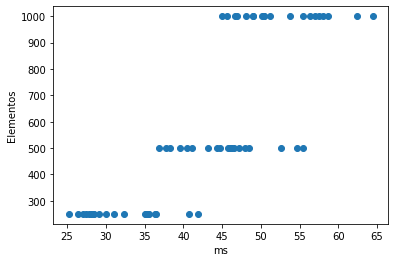

In [33]:
plt.scatter(times, series)
plt.xlabel("ms")
plt.ylabel("Elementos")
plt.show()

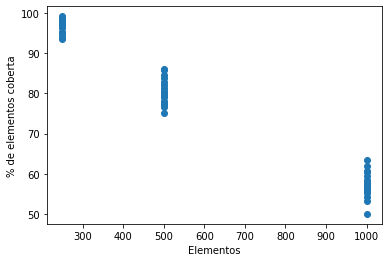

In [36]:
plt.scatter(series, coverages)
plt.xlabel("Elementos")
plt.ylabel("% de elementos coberta")
plt.show()